##### 第一題 #####

In [2]:
from __future__ import print_function, division

%matplotlib inline

import thinkdsp
import thinkplot
import numpy as np

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

In [3]:
class chuTrombone(thinkdsp.Chirp):
    """Represents a trombone-like signal with varying frequency."""
    
    def evaluate(self, ts):
        """Evaluates the signal at the given times.

        ts: float array of times
        
        returns: float wave array
        """
        l1, l2 = 1.0 / self.start, 1.0 / self.end
        lengths = np.linspace(l1, l2, len(ts)-1)
        freqs = 1 / lengths
        return self._evaluate(ts, freqs)

In [24]:
low=  220
high= 440
signal = chuTrombone(low, high)
wave = signal.make_wave(duration=1)
wave.apodize()
wave.make_audio()

##### 第二題 #####

In [26]:
from __future__ import print_function, division

import thinkdsp
import thinkplot
import thinkstats2

import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

%matplotlib inline

##### 1. #####

In [81]:
signal=thinkdsp.UncorrelatedUniformNoise()
x=signal.make_wave(duration=1,framerate=10000)

In [82]:
x.ys.shape

(10000,)

##### 2. #####

In [83]:
x.ys.max()

0.9999014831871715

In [84]:
x.ys.mean(), x.ys.std()

(0.006233822782601754, 0.575096502441753)

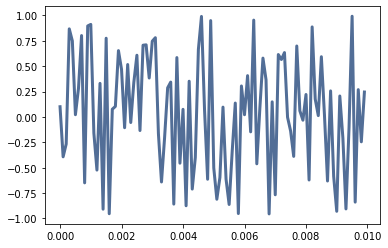

In [40]:
x.segment(start=0, duration=0.01).plot()

##### 3. #####

In [85]:
sx = x.make_spectrum()
sx.hs.shape

(5001,)

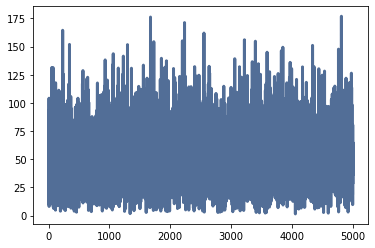

In [86]:
sx.plot()

##### 4. #####

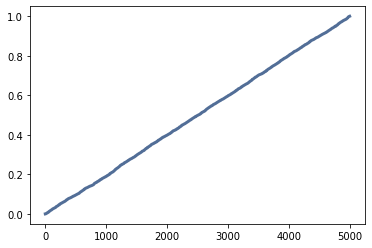

In [87]:
integ=sx.make_integrated_spectrum()
integ.plot_power()

##### 5. #####

No handles with labels found to put in legend.


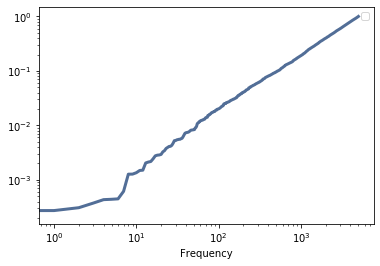

In [88]:
integ.plot_power()
thinkplot.config(xlabel='Frequency',
                 xscale='log', yscale='log')

##### 6. #####

In [89]:
sx.estimate_slope()

LinregressResult(slope=0.02910696059410299, intercept=7.322157925334919, rvalue=0.023057231224099625, pvalue=0.10305891362885088, stderr=0.017851557094391745)

##### 7. #####

##### 8. #####

##### 9. ######

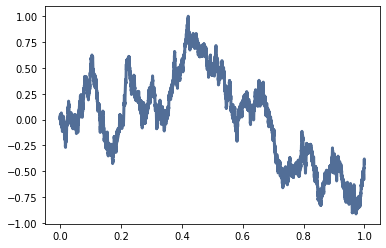

In [90]:
signal2 = thinkdsp.BrownianNoise()
z = signal2.make_wave(duration=1, framerate=10000)
z.plot()

In [92]:
sz = z.make_spectrum()

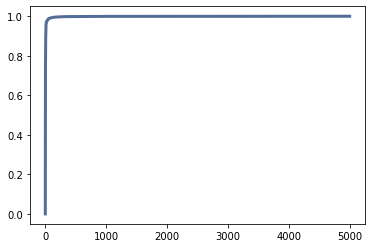

In [93]:
integ2=sz.make_integrated_spectrum()
integ2.plot_power()

No handles with labels found to put in legend.


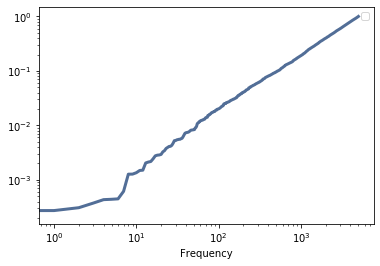

In [99]:
integ.plot_power()
thinkplot.config(xlabel='Frequency',
                 xscale='log', yscale='log')

In [98]:
sz.estimate_slope()

LinregressResult(slope=-1.8061291414686216, intercept=13.893604272637894, rvalue=-0.8111438807773338, pvalue=0.0, stderr=0.018420218811370865)

##### 10.#####

##### 第三題 #####

In [103]:
aUrl= 'https://query1.finance.yahoo.com/v7/finance/download/%5EGSPC?period1=-1325635200&period2=1588550400&interval=1d&events=history'
import pandas as pd
df= pd.read_csv(aUrl)

In [104]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1927-12-30,17.660000,17.660000,17.660000,17.660000,17.660000,0
1,1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0
2,1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0
3,1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0
4,1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0


In [118]:
len(df)

23193

In [116]:
len(df.columns)

7

In [129]:
ys=df['Close'].values
ts = np.arange(len(ys)) #df['Date'].values

No handles with labels found to put in legend.
No handles with labels found to put in legend.


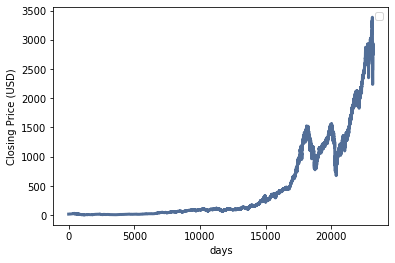

In [130]:
wave = thinkdsp.Wave(ys, ts, framerate=1)
wave.plot()
thinkplot.config(ylabel='Closing Price (USD)')
thinkplot.config(xlabel='days') #'Time (days)')

In [131]:
ys=ys[-5000:]